In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Dataset-thesis/newsdata504266with7labels.csv')
df

FileNotFoundError: ignored

In [ ]:
df1 = df.drop(columns=['Unnamed: 0'])
df1.head()

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...


In [ ]:
df1.isna().sum()
df2 = df1.dropna()
df1.isna().sum()

body      0
label     0
source    0
title     0
text      0
dtype: int64

In [ ]:
df1.shape

(504266, 5)

In [ ]:
max_length=df1["text"].str.len().max()
print(max_length)
min_length=df1["text"].str.len().min()
min_length

4743


326

In [ ]:
df1.drop(df1[df1['text'].str.len() > 5000].index, inplace = True)
df1.drop(df1[df1['text'].str.len() < 490].index, inplace = True)

In [ ]:
max_length=df1["text"].str.len().max()
print(max_length)
min_length=df1["text"].str.len().min()
min_length

4743


490

In [ ]:
df1.shape

(500620, 5)

In [ ]:
df2 = df1.reset_index(drop=True)

In [ ]:
# Look at classification type counts
counts = df2.label.value_counts()
print(len(counts))
print(counts)

7
sports                86243
international         83946
national              83939
all_bangladesh        80840
politics              65799
entertainment         52969
economics-business    46884
Name: label, dtype: int64


In [ ]:
top_6 = df2[df2['label'].isin(['sports','international','politics','entertainment','economics-business','national'])]
top_6.shape

(419780, 5)

In [ ]:
df2 = top_6

In [ ]:
df2.shape

(419780, 5)

In [ ]:
len(df2.body[20])

1894

In [ ]:
len(df2.text[20])

1577

In [ ]:
df2.body[0]

'ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়ারি এলাকায় শনিবার রাতে কাভার্ড ভ্যান ও বাসের মুখোমুখি সংঘর্ষে উত্তম পুরোহিত নামের এক গার্মেন্টস কর্মী নিহত হয়েছেন। একই দুর্ঘটনায় কমপক্ষে আরও জন আহত হয়েছেন। এদের মধ্যে জনকে চট্টগ্রাম মেডিক্যাল কলেজ হাসপাতালে ভর্তি করা হয়েছে। দুর্ঘটনার পর ভাটিয়ারি এলাকা দিয়ে মহাসড়কে যানবাহন চলাচলে ব্যাঘাত ঘটছে। ঘটনাস্থলে থাকা সীতাকুন্ড হাইওয়ে পুলিশের সার্জেন্ট মোহাম্মদ হাসান বাংলানিউজকে জানান শনিবার রাত পৌনে টার দিকে সীতাকুন্ড ছেড়ে আসা নম্বর রুটের একটি বাস ও নগরী ছেড়ে যাওয়া একটি দ্রুতগামী কাভার্ড ভ্যানের মধ্যে মুখোমুখি সংঘর্ষ হয়। এতে গুরুতর আহত জন বাস যাত্রীকে স্থানীয়রা উদ্ধার করে চমেক হাসপাতালে নিয়ে যান। এছাড়া আরও কমপক্ষে জন বাস যাত্রীকে প্রাথমিক চিকিৎসা দেওয়া হয়েছে বলে সার্জেন্ট হাসান জানান। চমেক হাসপাতালের পুলিশ ফাঁড়ির কনস্টেবল মোহাম্মদ হারুন বাংলানিউজকে জানান গুরুতর আহত জনকে আনার পর কর্তব্যরত চিকিৎসক উত্তম পুরোহিতকে মৃত ঘোষণা করেন। উত্তম নগরীর বাকলিয়া এলাকার জনৈক গোপাল পুরোহিতের ছেলে এবং তাদের গ্রামের বাড়ি সীতাকুন্ডের বার আউলিয়া এলাকায় বলে হারুন জানান। এ

In [ ]:
df2.text[0]

'ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়ারি এলাকায় শনিবার রাতে কাভার্ড ভ্যান বাসের মুখোমুখি সংঘর্ষে উত্তম পুরোহিত নামের এক গার্মেন্টস কর্মী নিহত হয়েছেন । দুর্ঘটনায় কমপক্ষে আহত হয়েছেন । চট্টগ্রাম মেডিক্যাল কলেজ হাসপাতালে ভর্তি হয়েছে । দুর্ঘটনার ভাটিয়ারি এলাকা দিয়ে মহাসড়কে যানবাহন চলাচলে ব্যাঘাত ঘটছে । ঘটনাস্থলে সীতাকুন্ড হাইওয়ে পুলিশের সার্জেন্ট মোহাম্মদ হাসান বাংলানিউজকে জানান শনিবার রাত পৌনে টার সীতাকুন্ড ছেড়ে আসা নম্বর রুটের বাস নগরী ছেড়ে দ্রুতগামী কাভার্ড ভ্যানের মুখোমুখি সংঘর্ষ । গুরুতর আহত বাস যাত্রীকে স্থানীয়রা উদ্ধার চমেক হাসপাতালে । এছাড়া কমপক্ষে বাস যাত্রীকে চিকিৎসা হয়েছে সার্জেন্ট হাসান জানান । চমেক হাসপাতালের পুলিশ ফাঁড়ির কনস্টেবল মোহাম্মদ হারুন বাংলানিউজকে জানান গুরুতর আহত আনার কর্তব্যরত চিকিৎসক উত্তম পুরোহিতকে মৃত ঘোষণা । উত্তম নগরীর বাকলিয়া এলাকার জনৈক গোপাল পুরোহিতের ছেলে গ্রামের বাড়ি সীতাকুন্ডের আউলিয়া এলাকায় হারুন জানান । এছাড়া উত্তম পুরোহিত নগরীর গার্মেন্টসে চাকরি করতেন কনস্টেবল হারুন আহতদের বরাত দিয়ে জানালেও প্রতিষ্ঠানের নাম জানাতে পারেননি । বাংলাদেশ সময় ঘণ্টা

In [ ]:
# Get classification types where counts are over 1000
#types = np.asarray(counts[(counts > 1000)].index)
types=['sports'
,'international'
,'national'
,'politics'
,'entertainment'
,'economics-business'
]
# Filter dataset's records for classification types > 1000
data = df2[df2.label.isin(types)]

#data_m = data[(data['classification'] =='HYDROLASE' )  (data['classification'] =='LIGASE' ) or (data['classification'] =='TRANSFERASE' ) or (data['classification'] =='OXIDOREDUCTASE' ) or (data['classification'] =='ISOMERASE' ) or (data['classification'] =='LYASE' )]

print(types)
print(len(types))
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['sports', 'international', 'national', 'politics', 'entertainment', 'economics-business']
6
419780 is the number of records in the final filtered dataset


In [ ]:
train=data
a=train.label.unique()
l=len(train.label.unique())
print(a)
print(len(a))

['national' 'sports' 'international' 'politics' 'economics-business'
 'entertainment']
6


In [ ]:
for i in range (l):
    train.label = train.label.replace(a[i], i)

In [ ]:
train1 = train
train2 = train1[['text','label']]                                                                                                                                                                           
train2

,text,label
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...,1
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...,2
...,...,...
500615,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,5
500616,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,1
500617,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...,5
500618,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,2


In [ ]:
# Look at classification type counts
counts = df2.label.value_counts()
print(len(counts))
print(counts)

6
sports                86243
international         83946
national              83939
politics              65799
entertainment         52969
economics-business    46884
Name: label, dtype: int64


In [ ]:
train2.label.value_counts()

1    86243
2    83946
0    83939
3    65799
5    52969
4    46884
Name: label, dtype: int64

In [ ]:
train3 = train2
train3.label = train3.label.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import GlobalMaxPool1D
from keras.utils import plot_model
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Concatenate
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import re
import tensorflow as tf

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(train3.text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 981660 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(train3.text.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (419780, 250)


In [ ]:
Y = pd.get_dummies(train3.label).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (419780, 6)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 32)           3232      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 125, 64)           24832     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1024128   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

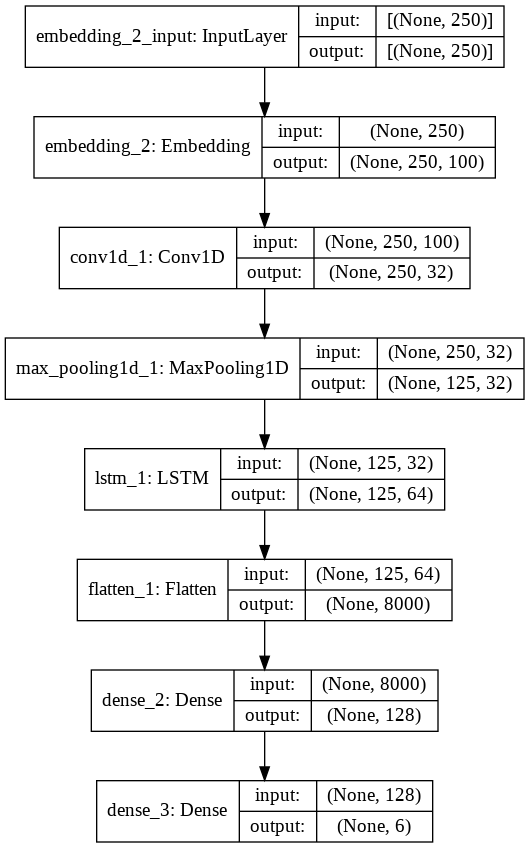

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(32, 1, activation= 'relu'))
model.add(MaxPooling1D(2))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(l, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

plot_model(model,'model.png',show_shapes=True)


In [ ]:
epochs = 10 
batch_size = 64

In [ ]:
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
5313/5313 [==============================] - 1062s 199ms/step - loss: 49567438.8221 - accuracy: 0.8765 - val_loss: 0.1871 - val_accuracy: 0.9323
Epoch 2/10
5313/5313 [==============================] - 1108s 209ms/step - loss: 0.1355 - accuracy: 0.9510 - val_loss: 0.1936 - val_accuracy: 0.9324
Epoch 3/10
5313/5313 [==============================] - 1133s 213ms/step - loss: 0.0989 - accuracy: 0.9630 - val_loss: 0.2138 - val_accuracy: 0.9309
Epoch 4/10
5313/5313 [==============================] - 1017s 191ms/step - loss: 0.0738 - accuracy: 0.9718 - val_loss: 0.2438 - val_accuracy: 0.9264


In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1312/1312 [==============================] - 37s 28ms/step - loss: 0.2363 - accuracy: 0.9291
Test set
  Loss: 0.236
  Accuracy: 0.929


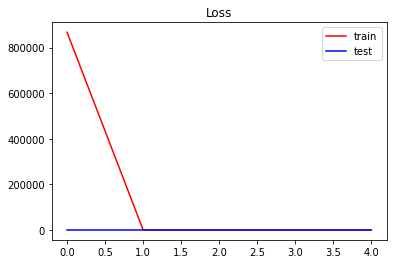

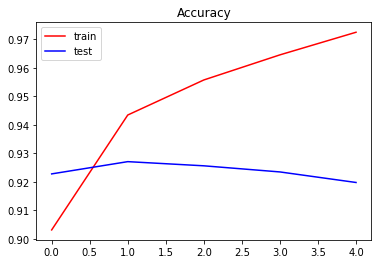

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],'b', label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r', label='train')
plt.plot(history.history['val_accuracy'],'b', label='test')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(test_features)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape
print(test_labels.shape)

(50062, 7)


In [ ]:
test_Y = np.argmax(np.round(test_labels),axis=1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(7)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.84      0.85      8316
     Class 1       0.98      0.98      0.98      8767
     Class 2       0.95      0.96      0.96      8387
     Class 3       0.96      0.93      0.95      8196
     Class 4       0.84      0.89      0.86      6496
     Class 5       0.89      0.89      0.89      4670
     Class 6       0.96      0.94      0.95      5230

    accuracy                           0.92     50062
   macro avg       0.92      0.92      0.92     50062
weighted avg       0.92      0.92      0.92     50062



In [ ]:
name=[]
for i in range(7):
  name.append(i)


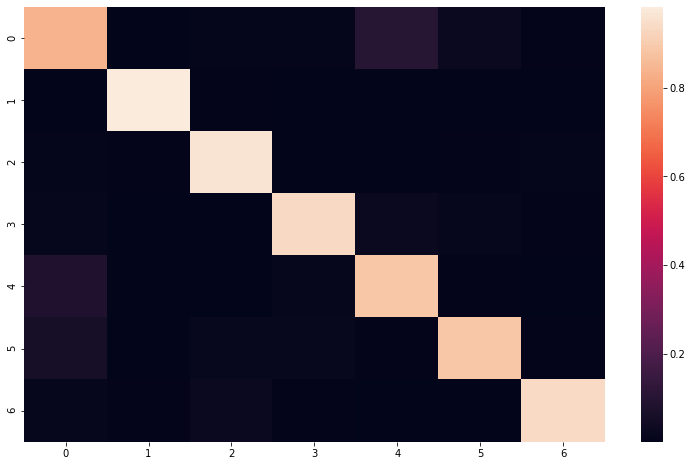

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(test_Y, predicted_classes, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[6976   25   71   84  863  258   39]
 [  39 8618   56   17    7   13   17]
 [  82   44 8081   38    9   56   77]
 [ 124   21   27 7659  204  121   40]
 [ 548    8   14  102 5781   34    9]
 [ 284   11   79   81   30 4153   32]
 [  77   40  147   30   13   18 4905]]
Normalized confusion matrix
[[8.39e-01 3.01e-03 8.54e-03 1.01e-02 1.04e-01 3.10e-02 4.69e-03]
 [4.45e-03 9.83e-01 6.39e-03 1.94e-03 7.98e-04 1.48e-03 1.94e-03]
 [9.78e-03 5.25e-03 9.64e-01 4.53e-03 1.07e-03 6.68e-03 9.18e-03]
 [1.51e-02 2.56e-03 3.29e-03 9.34e-01 2.49e-02 1.48e-02 4.88e-03]
 [8.44e-02 1.23e-03 2.16e-03 1.57e-02 8.90e-01 5.23e-03 1.39e-03]
 [6.08e-02 2.36e-03 1.69e-02 1.73e-02 6.42e-03 8.89e-01 6.85e-03]
 [1.47e-02 7.65e-03 2.81e-02 5.74e-03 2.49e-03 3.44e-03 9.38e-01]]


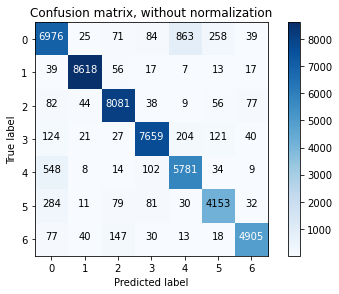

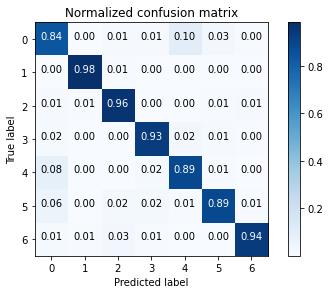

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()